# Library Importation

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Data importation

In [9]:
info_patents = pd.read_pickle('../info_patents')

In [20]:
info_companies = pd.read_csv('./Data/info_companies.csv')
info_companies = info_companies.drop(['Unnamed: 0'],axis=1)

In [11]:
info_mpatents = info_patents[info_patents.marked==1]

In [12]:
info_mpatents

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0
...,...,...,...,...,...,...,...
23905,10299691,2019-05-28,225,"[A, G]",[1b2d67d2-f1f9-4c29-8cd1-a5e75ba27be7],[13],1.0
23906,10292890,2019-05-21,966,[A],[f0997ba8-1ec2-4c0c-aaea-d80066a49317],[13],1.0
23907,10299968,2019-05-28,343,"[A, G]",[e5fc32c3-a913-455a-94ce-9932d30eefff],"[13, 6]",1.0
23908,10149616,2018-12-11,2133,[A],[4eb39673-7f59-4c45-bf6c-2275dccf9048],[13],1.0


In [21]:
info_companies

,assignee_id,assignee_organization,assignee_type,assignee_lastknown_country,assignee_total_num_patents,assignee_total_num_inventors
0,067e1110-7638-4840-8dfb-cc9434d518f1,INSTITUT PASTEUR,3,FR,821,1098
1,075fddd9-f31f-410e-a474-b4bb2283ef7e,Quinton Instrument Company,2,US,50,63
2,07dba387-b236-4355-bbfc-a2c33873f7a7,Cosmar Corporation,2,US,9,11
3,07ff496c-cec2-416d-9b5a-13a6fbd03c38,"Varitronic Systems, Inc.",2,US,18,16
4,0f63d31a-dac4-4326-afe8-e0d9ca77e826,SHIMADZU CORPORATION,3,JP,2479,1596
...,...,...,...,...,...,...
2293,f0e041be-a8f1-4d48-a61a-c61599c4c1e8,"Forever Holdings, Inc.",2,US,18,12
2294,f406fe97-781d-4e57-baef-b85a0bec5db5,"Mangata, LLC",2,US,5,1
2295,fc7bd073-509e-4aeb-8f54-676f32956397,"Ryft Systems, Inc.",2,US,4,16
2296,fdd256e2-bbaa-4063-a960-6b0f0e0307b6,"NuVasive Specialized Orthopedics, Inc.",2,US,34,46


# Repartition of IPC categories

In [116]:
list_ipc = []
for indx,el in enumerate(info_patents.ipc_section):
    if el !=None:
        list_ipc.extend(el)


In [128]:
for index,el in enumerate(list_ipc):
    if el == 'Z':
        print(index,el)

1065856 Z
1729122 Z


In [171]:
list_ipc[1065853:1065859]

['H', 'A', 'C', 'Z', 'H', 'A']

In [140]:
info_patents.ipc_section.astype(str)[0]

"['A', 'C']"

In [177]:
info_patents

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0
...,...,...,...,...,...,...,...
1915706,D555179,2007-11-13,299,None,[dc77a1b1-f087-4a19-992d-6393caf66347],None,0.0
1915707,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0
1915708,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0
1915709,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0


In [113]:
info_patents[info_patents.ipc_section == ['A','C']]

ValueError: ('Lengths must match to compare', (1915711,), (2,))

In [106]:
info_patents.ipc_section[0] == ['A','C']

True

(array([1.897722e+06, 2.831370e+05, 2.481300e+04, 6.900000e+01,
        3.500000e+01, 6.400000e+01, 3.900000e+01, 2.000000e+01,
        4.000000e+00, 9.000000e+00]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

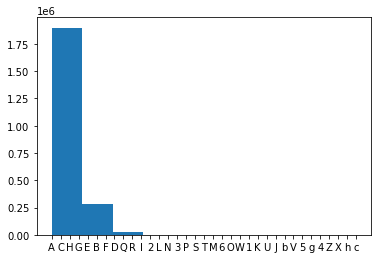

In [178]:
plt.hist(list_ipc)

In [196]:
info_mpatents[info_mpatents.ipc_section.astype(str)=="['A']"]

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked
10,5680857,1997-10-28,1887,[A],[a467fec6-886c-490f-82cd-6b90563b55be],[13],1.0
12,5391170,1995-02-21,872,[A],[8327837f-3ac3-4a6c-9dc3-817e3b3adaed],"[13, 26]",1.0
15,5716981,1998-02-10,979,[A],[fab52a19-d63d-4055-9723-d03ef632e119],"[16, 13, 15, 17]",1.0
24,5797215,1998-08-25,642,[A],None,[29],1.0
29,5259385,1993-11-09,687,[A],[13e881d2-78d7-4d39-80b6-02604e3d8b73],[13],1.0
...,...,...,...,...,...,...,...
23899,10182804,2019-01-22,763,[A],[26b5dd81-0bc3-45b0-af7c-5ed3f542fd9c],[13],1.0
23901,10278772,2019-05-07,278,[A],[e3e16b4a-aba6-4da0-8d41-b012c689b50f],[13],1.0
23906,10292890,2019-05-21,966,[A],[f0997ba8-1ec2-4c0c-aaea-d80066a49317],[13],1.0
23908,10149616,2018-12-11,2133,[A],[4eb39673-7f59-4c45-bf6c-2275dccf9048],[13],1.0


In [195]:
info_mpatents.ipc_section.astype(str)[].find('A',)

-1

In [209]:
documentid = pd.read_csv('./Data/documentid_red.csv')
assignor = pd.read_csv('./Data/assignor_red.csv')
assignee = pd.read_csv('./Data/assignee_red.csv')

In [203]:
documentid

,rf_id,title,lang,appno_doc_num,appno_date,appno_country,pgpub_doc_num,pgpub_date,pgpub_country,grant_doc_num,grant_date,grant_country
0,38690834,MICROBIAL PRODUCTION OF MATURE HUMAN LEUKOCYTE...,en,6256204.0,1981-04-21,US,NaN,NaN,NaN,6610830,2003-08-26,US
1,38810454,MICROBIAL PRODUCTION OF MATURE HUMAN LEUKOCYTE...,en,6256204.0,1981-04-21,US,NaN,NaN,NaN,6610830,2003-08-26,US
2,40920197,ELECTRICAL CONNECTOR ASSEMBLY,en,6061981.0,1979-07-30,US,NaN,NaN,NaN,4227762,1980-10-14,US
3,47550483,DATA SENSING AND PROCESSING DEVICE FOR SCUBA D...,en,7003085.0,1987-01-14,US,NaN,NaN,NaN,4882678,1989-11-21,US
4,47550486,DATA SENSING AND PROCESSING DEVICE FOR SCUBA D...,en,7003085.0,1987-01-14,US,NaN,NaN,NaN,4882678,1989-11-21,US
...,...,...,...,...,...,...,...,...,...,...,...,...
31918,513520022,ROOM TEMPERATURE CURABLE SILICONE ELASTOMER CO...,en,12517057.0,2010-01-21,US,2.010014e+10,2010-06-10,US,9284454,2016-03-15,US
31919,514040930,MOUSETRAP,en,11067157.0,2005-02-25,US,2.006019e+10,2006-08-24,US,7231738,2007-06-19,US
31920,514040930,MOUSETRAP,en,10595596.0,2006-09-06,US,2.007002e+10,2007-01-25,US,7506471,2009-03-24,US
31921,514040930,MOUSETRAP,en,13216782.0,2011-08-24,US,2.011030e+10,2011-12-15,US,8397426,2013-03-19,US


In [213]:
documentid
assignee

,rf_id,ee_name,ee_address_1,ee_address_2,ee_city,ee_state,ee_postcode,ee_country
0,38690834,"HOFFMANN-LA ROCHE INC., A CORP. OF NJ",NaN,NaN,NUTLEY,NEW JERSEY,NaN,NaN
1,38810454,"GENENTECH, INC., A CORP. OF CA",460 POINT SAN BRUNO BLVD.,NaN,S. SAN FRANCISCO,CALIFORNIA,94080,NaN
2,40920197,ANDOVER MEDICAL INCORPORATED; A CORP OF MA.,"341 MIDDLESEX ST.,",NaN,"LOWELL,",MASSACHUSETTS,NaN,NaN
3,47550483,"AMERICAN UNDERWATER PRODUCTS, INC., DBA OCEANI...",NaN,NaN,NaN,NaN,NaN,NOT PROVIDED
4,47550486,"AMERICAN UNDERWATER PRODUCTS, INC., DBA OCEANI...",NaN,NaN,NaN,NaN,NaN,NOT PROVIDED
...,...,...,...,...,...,...,...,...
25003,513050894,"HEWLETT-PACKARD DEVELOPMENT COMPANY, L.P.",10300 ENERGY DRIVE,NaN,SPRING,TEXAS,77389,NaN
25004,513150922,ARMACELL ENTERPRISE GMBH & CO. KG,ZEPPELINSTRASSE 1,NaN,1259 SCHÖNEFELD OT WALTERSDORF,NaN,NaN,GERMANY
25005,513280139,"FK II, LLC","300 N LA SALLE DR, STE 5400",A DELAWARE LIMITED LIABILITY COMPANY,CHICAGO,ILLINOIS,60654,NaN
25006,513520022,TESA SE,"HUGO -KIRCHBERG-STR. 1,",NaN,"NORDERSTEDT,",NaN,22848,GERMANY


In [ ]:
assign